### Neural Network from SCRATCH (Numpy + Linear Algebra)

This notebook consists of building a neural network from scratch, without relying on popular deep learning libraries like TensorFlow or PyTorch. Our star of the show is the well-known MNIST fashion dataset, which contains 28x28 pixel images of various clothing items and their respective labels.

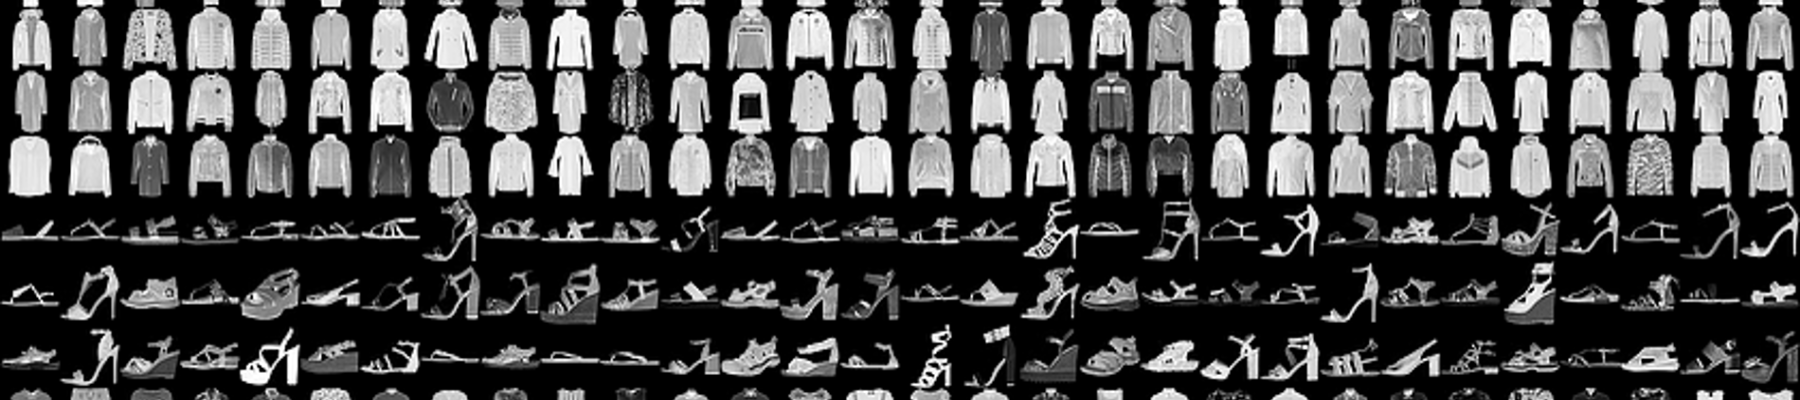

Big shoutout to Samson Zhang :D whose video on [Building a Neural Network FROM SCRATCH](https://youtu.be/w8yWXqWQYmU?si=iX0cS66bJJTdqnlH) has been a fantastic resource. It's thanks to Samson's video that I've gained a deep understanding of how neural networks work at a fundamental level.

In [1]:
# Importing libraries 

import numpy as np # Linear Algebra + Mathematical Operations
import pandas as pd # Loading the data into tabular format known as a DataFrame
import matplotlib.pyplot as plt # Data Visualisation, used to display our image data

In [2]:
fashion_dict = {
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

### Loading the Data

In [3]:
# pd.read_csv() loads the train and test data files as a pandas DataFrame
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

train.head()

Train set shape: (60000, 785)
Test set shape: (10000, 785)


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

Each column (except the label column) in our Dataset corresponds to a pixel in our image (28 x 28 = 784). 

Our data consists of 60000 images for the train set and 10000 images for the test set.

The "label" column shows which the clothin item that each image shows.

### Splitting Data into Training and Validation

In [5]:
# Converting train and test to NumPy arrays
train = np.array(train)
test = np.array(test)

In [6]:
# Train test split is used to take a portion of training set as our validation set
from sklearn.model_selection import train_test_split

# Seperating our image and their respective labels into X and y
X = train[:, 1:]
y = train[:, 0]

# In train test split, we set stratify to y
# This prevents a class imbalance when training and predicting our model later on
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  stratify=y, test_size=0.2,
                                                  random_state=42)

# Splitting test set into features and labels
X_test, y_test = test[:, 1:], test[:, 0]

In [7]:
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape:{X_val.shape} ")
print(f"Test set shape: {X_test.shape}")

Train set shape: (48000, 784)
Validation set shape:(12000, 784) 
Test set shape: (10000, 784)


### Scaling down & Transposing our features

When the features in your dataset have significantly different scales, it can lead to several issues during training and optimization.

We then transpose our features so matrix multiplication is feasible later on.

In [8]:
# Colour ranges for black and white
# span from 0 - 255. Dividing by 255
# will return us values ranging from 0-1

X_train_t = (X_train / 255).T
X_val_t = (X_val / 255).T
X_test_t = (X_test / 255).T

### Building our Neural Network

For this example, we will be creating a simple Neural Network with 3 

In [9]:
def init_params():
    # Weight of 
    W1 = np.random.rand(10, 784)
    
    print(W1)
    
init_params()

[[0.97853487 0.51378562 0.39924899 ... 0.60922792 0.40762649 0.1312294 ]
 [0.89996281 0.84583594 0.36114357 ... 0.37851359 0.85571447 0.86831604]
 [0.71755873 0.89460823 0.94335621 ... 0.34530983 0.76427414 0.53926016]
 ...
 [0.15275272 0.8571024  0.18802825 ... 0.90327564 0.19122913 0.81806419]
 [0.99932619 0.73654665 0.954875   ... 0.00122071 0.61818598 0.58096821]
 [0.19956022 0.45241811 0.74068826 ... 0.46346136 0.78633945 0.7998015 ]]


### Neural Network with Tensorflow

As comparison, we will also be building a neural network using Keras.

In [10]:
from tensorflow import keras
print('keras: ', keras.__version__)

# Creating copies of our dataset
X_train_tf = X_train.copy()
y_train_tf = y_train.copy()

X_val_tf = X_val.copy()
y_val_tf = y_val.copy()

keras:  2.10.0


In [11]:
# Scaling down our data
X_train_tf = X_train_tf / 255
X_val_tf = X_val_tf / 255

In [12]:
# One-Hot encoding our labels
from tensorflow.keras.utils import to_categorical

y_train_tf = to_categorical(y_train_tf)
y_val_tf = to_categorical(y_val_tf)

In [13]:
# Importing keras to load our model and layers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Creating our neural network using keras
# For this case, we will be using a NN with 3 layers (Input, 1 Hidden, Output)
model_tf = models.Sequential()
model_tf.add(layers.Dense(10, activation='relu', input_shape=(784, ))) # Hidden layer
model_tf.add(layers.Dense(10, activation='softmax')) # Output layers

model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling our model
model_tf.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
# Hyperparameters
NUM_EPOCHS = 20
BATCH_SIZE = 128

# Fitting our model with our training data and labels
# Epochs is set to 10 
# Batch size is set to 128, meaning that each epoch, the model will update itself 375 times
model_tf.fit(X_train_tf, y_train_tf, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.9073 - accuracy: 0.6920
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.8179
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.8338
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.8401
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8445
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.8497
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8507
Epoch 8/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8547
Epoch 9/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8570
Epoch 10/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8597

In [16]:
# Evaluating model performance on Validation set
val_loss, val_acc = model_tf.evaluate(X_val_tf, y_val_tf, verbose=2)

375/375 - 0s - loss: 0.3967 - accuracy: 0.8612 - 451ms/epoch - 1ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

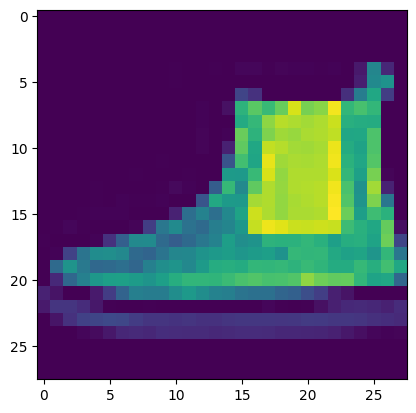

In [17]:
# Predicting on validation set
plt.imshow(X_val_tf[20].reshape(28, 28))

y_val_tf[20]

In [18]:
val_pred = model_tf.predict(X_val_tf[20].reshape(1, 784))

print(f"Predicted Fashion Item: {val_pred.argmax()}, {fashion_dict[val_pred.argmax()]}")
print()
print("Actual Prediction Probabilities: \n", val_pred)

1/1 [==============================] - 0s 46ms/step
Predicted Fashion Item: 9, Ankle boot

Actual Prediction Probabilities: 
 [[1.2112773e-07 3.5483808e-12 4.3834717e-08 2.4331183e-07 2.5126445e-08
  7.2408561e-04 9.0382002e-07 2.6288347e-02 2.3664710e-05 9.7296256e-01]]
